#**Первая лабораторная работа**#

Вариант 22

Выполнил:

Суханкулиев Мухаммет,
студент группы N3246

поток Мат Стат 28.3

**Цель и постановка задач**

Дана выборка объема $n = 20$,
по ней:

1. приблизить мат ожидание, дисперсию

2. построить вариационный ряд и эмпирическую функцию распределения - график

3. найти медиану

Сделать выводы.

In [126]:
import numpy as np
import matplotlib.pyplot as plt

Исходные данные из файла
https://docs.google.com/document/d/1puHSE0i0u0k3s2WAC7Yk4t3q1bfAZ5EooT5mu3CUT9s

(Вариант 22)

In [127]:
data = np.array([2.34, 2.01, 2.06, 1.86, 1.13, 2.88, 2.33, 1.86, 2.06, 1.29,
                 2.45, 2.9, 1.49, 1.94, 3.11, 1.79, 2.51, -0.1, 1.85, 1.49])

**1. Приблизить мат ожидание, дисперсию**

Приближенное математическое ожидание (выборочное среднее) $\bar{X}$:
$$\bar{X} = \frac{1}{n} \sum_{i}^{n} x_i$$

Приближенная дисперсия (не смещенная) $S_o$:
$$S_o = \frac{1}{n-1} \sum_{i}^{n} (x_i - \bar{X})^2$$
или
$$S_o = \frac{1}{n-1} \sum_{i}^{n} (x_i^2 - \bar{X}^2)$$

Так же сравним значения, вычисленные вручную со значениями, полученными с помощью библиотеки `numpy`

In [128]:
n = len(data)  # Объем выборки - количество значений случайных величин

# 1. Выборочное среднее (приближенное математическое ожидание)
E_x = sum(data) / n

print(f"Приближенное математическое ожидание (вручную):  {E_x:.4f}")
print(f"Приближенное математическое ожидание   (numpy):  {np.mean(data):.4f}")

# Приближенная дисперсия (не смещенная)
S_o = sum((x - E_x) ** 2 for x in data) / (n - 1)

print(f"Приближенная дисперсия               (вручную):  {S_o:.4f}")

S_o2 = sum((x ** 2 - E_x ** 2) for x in data) / (n - 1)

print(f"Приближенная дисперсия             (вручную_2):  {S_o2:.4f}")
print(f"Выборочная дисперсия                   (numpy):  {np.var(data, ddof=1):.4f}")

Приближенное математическое ожидание (вручную):  1.9625
Приближенное математическое ожидание   (numpy):  1.9625
Приближенная дисперсия               (вручную):  0.5149
Приближенная дисперсия             (вручную_2):  0.5149
Выборочная дисперсия                   (numpy):  0.5149


**2. Построить вариационный ряд и эмпирическую функцию распределения - график**

Вариационный ряд — это значения случайных величин, упорядоченных по возрастанию.

In [129]:
# 2. Вариационный ряд
sorted_data = np.sort(data)

print("Вариационный ряд:")
print(sorted_data)

Вариационный ряд:
[-0.1   1.13  1.29  1.49  1.49  1.79  1.85  1.86  1.86  1.94  2.01  2.06
  2.06  2.33  2.34  2.45  2.51  2.88  2.9   3.11]


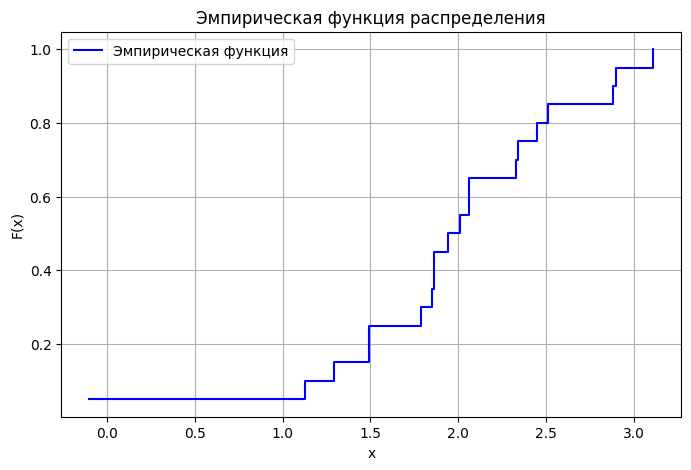

In [130]:
# Эмпирическая функция распределения
y = np.arange(1, n + 1) / n # Координаты для ЭФР

plt.figure(figsize=(8, 5))
plt.step(sorted_data, y, where="post", label="Эмпирическая функция", color="blue")

plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("Эмпирическая функция распределения")
plt.legend()
plt.grid()
plt.show()

**3. Найти медиану**

Если ряд состоит из нечётного количества чисел, то медиана — это число, которое находится ровно посередине в упорядоченном ряде.

Если ряд состоит из чётного количества чисел, то медиана — это среднее арифметическое двух чисел, которые находятся посередине в упорядоченном ряде.

Так же сравним с `numpy`

In [131]:
# 3. Вычисляем медиану вручную
if n % 2 == 1:
    median_x = sorted_data[n // 2]
else:
    median_x = (sorted_data[n // 2 - 1] + sorted_data[n // 2]) / 2

print(f"Медиана (вручную):  {median_x:.4f}")

# Сравнение с numpy
print(f"Медиана   (numpy):  {np.median(data):.4f}")

Медиана (вручную):  1.9750
Медиана   (numpy):  1.9750


Построим гистограмму с наложенной оценкой плотности распределения (с помощью `seaborn.histplot`):

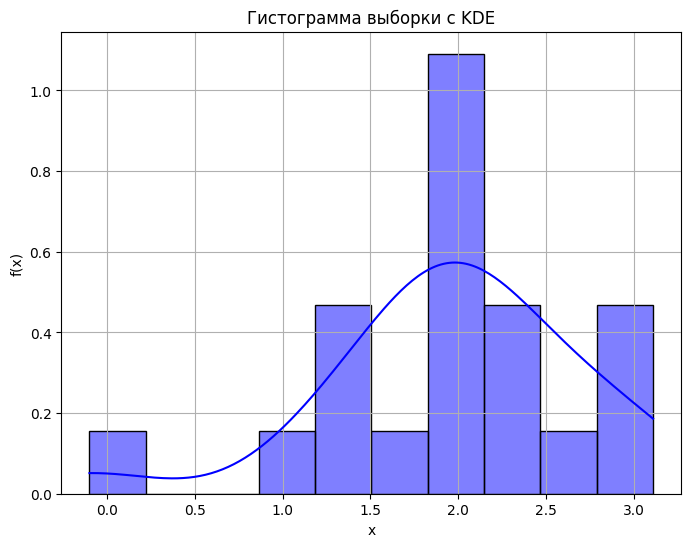

In [132]:
# Построение гистограммы с KDE
from seaborn import histplot
plt.figure(figsize=(8, 6))

histplot(data, bins=10, kde=True, stat="density", color='blue', alpha=0.5)

plt.title("Гистограмма выборки с KDE")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

**Ответы**

Для выборки объемом $n=20$

`[2.34, 2.01, 2.06, 1.86, 1.13, 2.88, 2.33, 1.86, 2.06, 1.29, 2.45, 2.9, 1.49, 1.94, 3.11, 1.79, 2.51, -0.1, 1.85, 1.49]`

1. Приближенное математическое ожидание:
$$\bar{X} \approx 1.9625$$
Приближенная дисперсия:
$$S_o \approx 0.5149$$

2. Вариационный ряд:
$$[-0.1, 1.13, 1.29, 1.49, 1.49, 1.79, 1.85, 1.86, 1.86, 1.94, 2.01, 2.06, 2.06, 2.33, 2.34, 2.45, 2.51, 2.88, 2.9, 3.11]$$
Эмпирическая функция распределения постоена выше.

3. $$Медиана = 1.975$$

#**Выводы**#

Полученное значение для **приближенного математического ожидания** демонстрирует, как **выборочное среднее** приближает истинное математическое ожидание.

Полученное значение **приближенной дисперсии** говорит о том, насколько сильно отклоняются элементы выборки от выборочного среднего. **Несмещенная дисперсия** является более точной оценкой истинной дисперсии для популяции, поскольку исправляет возможное недооценивание дисперсии, связанное с использованием выборочного среднего.

Приближенные значения математического ожидания и дисперсии для данной выборки совпадают с вычислениями в `numpy`.

**Эмпирическая функция** позволяет наглядно увидеть распределение наблюдаемых значений и оценить, как они могут быть сгруппированы в более крупной популяции, грубо говоря, она визуализирует накопление вероятности по мере увеличения значений выборки.

**Медиана** выборки является важной характеристикой центральной тенденции, и её вычисления вручную подтверждаются результатами из библиотеки `numpy`.

Построенная **гистограмма с наложенной кривой оценки плотности распределения (KDE)** позволяет визуализировать распределение данных и оценить его форму.

#**Заключение**#

В ходе выполнения лабораторной работы были получены основные статистические характеристики выборки: математическое ожидание, дисперсия, медиана и вариационный ряд. Также была построена эмпирическая функция распределения и визуализированы данные с помощью гистограммы и кривой плотности.